In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os as os

### Reading dataset

In [2]:
os.chdir('/home/himanshu/wine_data')
data_red = pd.read_csv('winequality-red.csv', sep = ';')

In [3]:
data_red.shape

(1599, 12)

In [4]:
data_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
train_y = data_red.quality.values

In [7]:
train_y = train_y.reshape(1,-1)

In [8]:
train_y.shape

(1, 1599)

In [9]:
train_x = data_red.iloc[:,0:11].values

In [10]:
train_x.shape

(1599, 11)

In [11]:
#Splitting dataset into training and cross-validation sets
from sklearn.cross_validation import train_test_split

X_train, X_cv, Y_train, Y_cv = train_test_split(train_x, data_red.quality, test_size = 0.2, random_state = 56)

/home/himanshu/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
Y_train = Y_train.reshape(1,-1)
Y_cv = Y_cv.reshape(1,-1)

/home/himanshu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.
/home/himanshu/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [13]:
Y_train.shape

(1, 1279)

### Linear Regression Model

In [14]:
features = data_red.columns[:-1]

In [15]:
## no. of data points
m = len(train_x)       

## initialting weight matrices
t0 = 1

W = np.zeros(train_x.shape[1]).reshape(1,-1)
W.shape

(1, 11)

In [41]:
def cost_func(x, y, W):

    ## cost function expression
    J = np.sum((W.dot(x.T) - y)**2/(2*m)) 

    return J

In [17]:
initial_cost = cost_func(train_x, train_y)
print 'initial_cost = %f' %(initial_cost)

initial_cost = 16.208255


In [19]:
def Gradient_descent(x, y, alpha, max_iter):
    
    W = np.zeros(x.shape[1]).reshape(1,-1)
    cost_i = [0]*max_iter
    m = len(x)
    t0 = 1
       
    for i in range(max_iter):
        h = t0 + W.dot(x.T)    ## hypothesis func
        
        loss = h - y     ## training loss
        
        ## gradient calculation
        grad0 = loss/m
        grad1 = np.dot(loss,x)/m
        
        ## updating weights
        t0 = t0 - alpha*grad0
        W = W - alpha*grad1 
        
        ## cost function  
        #cost = cost_func(x, y)
        cost = np.sum((W.dot(x.T) - y)**2/(2*m))
        
        cost_i[i] = cost
        #print 'training_cost[i] = %f' %(cost_i[i])
        
    plt.plot(range(max_iter), cost_i)
    plt.ylabel('Training loss')
    plt.xlabel('Iteration')
    plt.show()
    
        
    return h, t0, W,cost

    

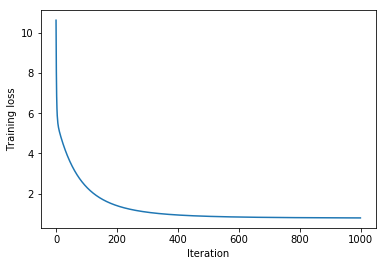

In [20]:
## Training Cycle
Y_pred_t, bias_t, weights_t, cost_t = Gradient_descent(X_train,Y_train, alpha=10e-5, max_iter=1000)

In [42]:
## Test Cycle

Y_pred = weights_t.dot(X_cv.T) + bias_t.reshape(-1,1)[-1]
test_cost = cost_func(X_cv,Y_cv,weights_t)
print test_cost

0.151789082347


### Model Evaluation

In [43]:
## Model Evaluation - Root mean sq. error
def rmse(Y, Y_pred):
    rmse = np.sqrt(np.sum((Y - Y_pred) ** 2)/len(Y))
    return 'rmse = %f' %(rmse)

## Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = np.sum((Y - mean_y) ** 2)
    ss_res = np.sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return 'r2_score = %f' %(r2)


print(rmse(Y_cv, Y_pred))
print(r2_score(Y_cv, Y_pred))

rmse = 12.389052
r2_score = 0.243899
